# **6. 다양한 머신러닝 기법들**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---


### **6장 미니 프로젝트 B1** -얼굴 찾기: SVM으로 분류하기


In [ ]:
# 필요한 패키지 임포트하기

import numpy as np                         # 수치데이터를 다루기 위한 넘파이
from skimage.io import imread              # 이미지 데이터를 다루기 위한 scikit learn 이미지 모듈
import matplotlib.pyplot as plt            # 가시화를 위한 matplotlib
import cv2                                 # 이미지 처리를 위한 OpenCV 라이브러리 활용
from sklearn.decomposition import PCA      # 주성분 분석을 통해 차원을 축소시키기 위한 라이브러리
from sklearn.svm import LinearSVC          # 선형 커널 사용 SVM을 이용한 분류기
from sklearn.svm import SVC                # 다양한 커널 트릭을 사용할 수 있는 SVM 분류기
from sklearn.pipeline import make_pipeline # 입력 파이프라인 구성



In [ ]:
# 훈련에 필요한 데이터의 위치와 데이터를 저장할 리스트 준비

url = 'https://github.com/dknife/ML2nd/raw/main/data/Proj2/'
X, y = [], []

In [ ]:
# 데이터 폴더의 하위 폴더인 faces와 animals에서
# 각각 15개씩의 이미지를 읽고 64x64 그레이 이미지로 변형
# 각각의 폴더 이미지에 대해 레이블을 0과 1로 부여

for label, folder in enumerate(['faces/', 'animals/']):
    for i in range(1, 16):
        img = imread(url + folder + f'img{i:02d}.jpg')
        img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), (64,64))
        X.append(img.ravel())          # ravel: 다차원 배열을 1차원으로 펼치는 함수
        y.append(label)

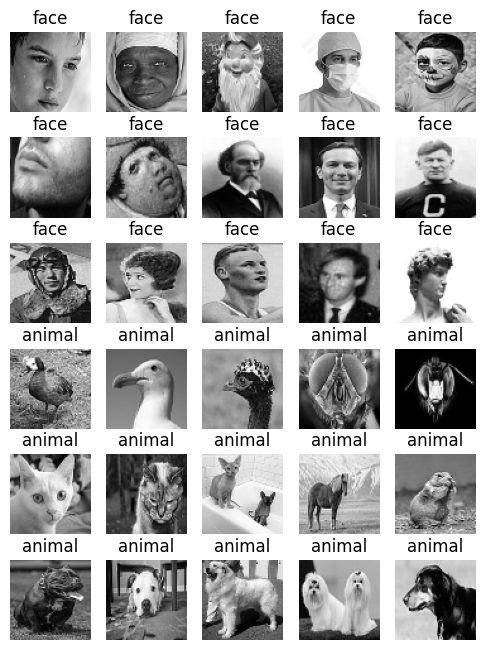

In [ ]:
# 읽어들인 이미지 X를 화면에 보이고
# 각각의 이미지에 달린 레이블이 0이면 face, 1이면 animal 타이틀 출력

plt.figure(figsize=(6,8))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(np.array(X[i]).reshape(64,64), cmap='gray')
    plt.title(f'{"animal" if y[i] else "face"}')
    plt.axis('off')
plt.show()

In [ ]:
# 30개의 이미지 각각이 64x64 픽셀인데, 이것은 SVM의 인스턴스로는 너무 많은 특징을 갖는다.
# 각각의 이미지에 대해 주성분 분석을 실시하여
# 각 이미지를 PCA_dim 차원의 벡터로 바꾼다.

PCA_dim = 20
nImages = len(X)
print(nImages, PCA_dim)

my_pca = PCA(n_components=PCA_dim, whiten=True).fit(X)   # X는 4096차원 벡터 30개
scores_all = my_pca.transform(X)                         # (30, PCA_dim)  ← 30장 전체

#scores_norm = scores_all / np.abs(scores_all).max()   # -1 .. 1


30 20


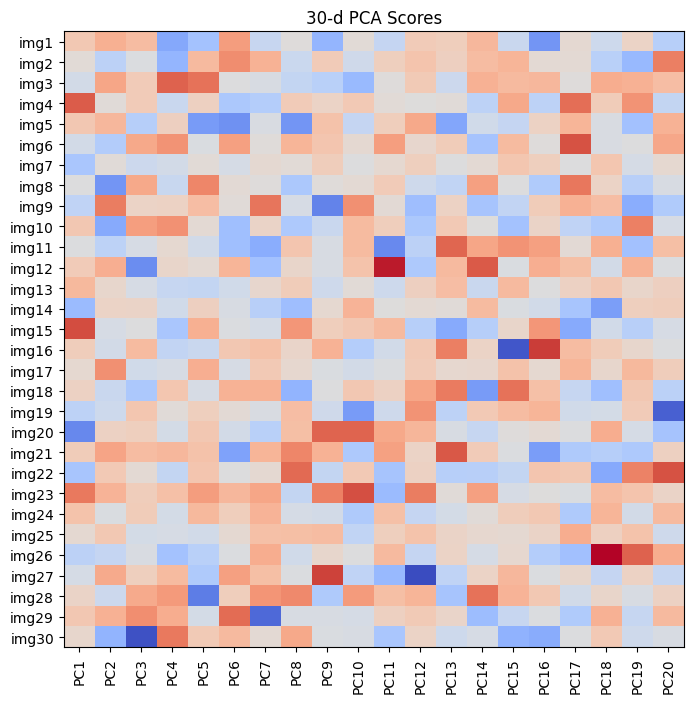

In [ ]:
# 각 이미지가 가지는 PCA 벡터를 가시화

fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(scores_all, cmap='coolwarm', aspect='auto')
ax.set_yticks(range(nImages))
ax.set_yticklabels([f'img{i+1}' for i in range(nImages)])
ax.set_xticks(range(PCA_dim))
ax.set_xticklabels([f'PC{i+1}' for i in range(PCA_dim)], rotation=90)
ax.set_title('30-d PCA Scores')
plt.show()

In [ ]:
# 파이프라인을 이용하여 동일한 PCA를 실시하고 그 결과를 SVM에 적용하게 함

clf = make_pipeline(my_pca, LinearSVC(C=1.0))
clf.fit(X, y)


Pipeline(steps=[('pca', PCA(n_components=20, whiten=True)),
                ('linearsvc', LinearSVC())])

In [ ]:
# 테스트 10장 예측
test = []
for i in range(1, 11):
    img = imread(url + f'test_data/img{i:02d}.jpg')
    img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), (64,64))
    test.append(img.ravel())
print('예측:', clf.predict(test))

예측: [0 0 0 1 0 0 1 0 0 1]


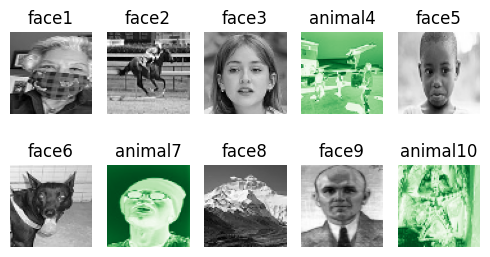

In [ ]:
pred = clf.predict(test)          # 0 or 1 벡터
plt.figure(figsize=(5, 3))
for i in range(10):               # 0~9 인덱스
    plt.subplot(2, 5, i+1)

    if pred[i] == 0:              # 사람이면
        plt.imshow(test[i].reshape(64,64), cmap='gray')
        plt.title(f'face{i+1}')
    else:                         # 사람 아니면 반전
        plt.imshow((1 - test[i]).reshape(64,64), cmap='Greens_r')
        plt.title(f'animal{i+1}')

    plt.axis('off')
plt.tight_layout(); plt.show()

In [ ]:


from sklearn.pipeline import make_pipeline
clf = make_pipeline(
    my_pca,
    SVC(kernel='poly', degree=3, C=1.0, gamma='auto', coef0=1.0)
)

clf.fit(X, y)

Pipeline(steps=[('pca', PCA(n_components=20, whiten=True)),
                ('svc', SVC(coef0=1.0, gamma='auto', kernel='poly'))])

In [ ]:

print('예측:', clf.predict(test))

예측: [0 1 1 1 0 1 0 0 0 1]


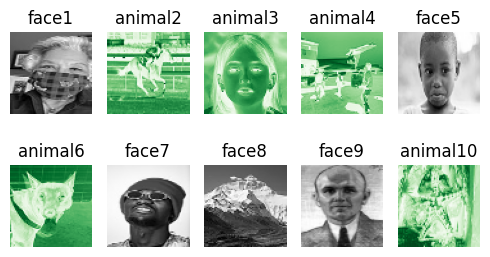

In [ ]:
pred = clf.predict(test)          # 0 or 1 벡터
plt.figure(figsize=(5, 3))
for i in range(10):               # 0~9 인덱스
    plt.subplot(2, 5, i+1)

    if pred[i] == 0:              # 사람이면
        plt.imshow(test[i].reshape(64,64), cmap='gray')
        plt.title(f'face{i+1}')
    else:                         # 사람 아니면 반전
        plt.imshow((1 - test[i]).reshape(64,64), cmap='Greens_r')
        plt.title(f'animal{i+1}')

    plt.axis('off')
plt.tight_layout(); plt.show()